# METHOD 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
df = pd.read_csv('/content/KTE2_VA.csv',
                 parse_dates={'dt' : ['date', 'time']}, infer_datetime_format=True,
                 index_col='dt')
df.head()

<ipython-input-2-cb2ff6af66c4>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/KTE2_VA.csv',


VA  hour  day_of_week  month  day_of_year
dt                                                                 
2022-01-01 00:01:00  237.234     0            7      1            1
2022-01-01 00:57:00  234.406     0            7      1            1
2022-01-01 01:25:00  235.978     1            7      1            1
2022-01-01 01:54:00  233.935     1            7      1            1
2022-01-01 02:22:00  235.131     2            7      1            1

In [ ]:
df.shape

(25259, 5)

In [ ]:
import matplotlib.pyplot as plt

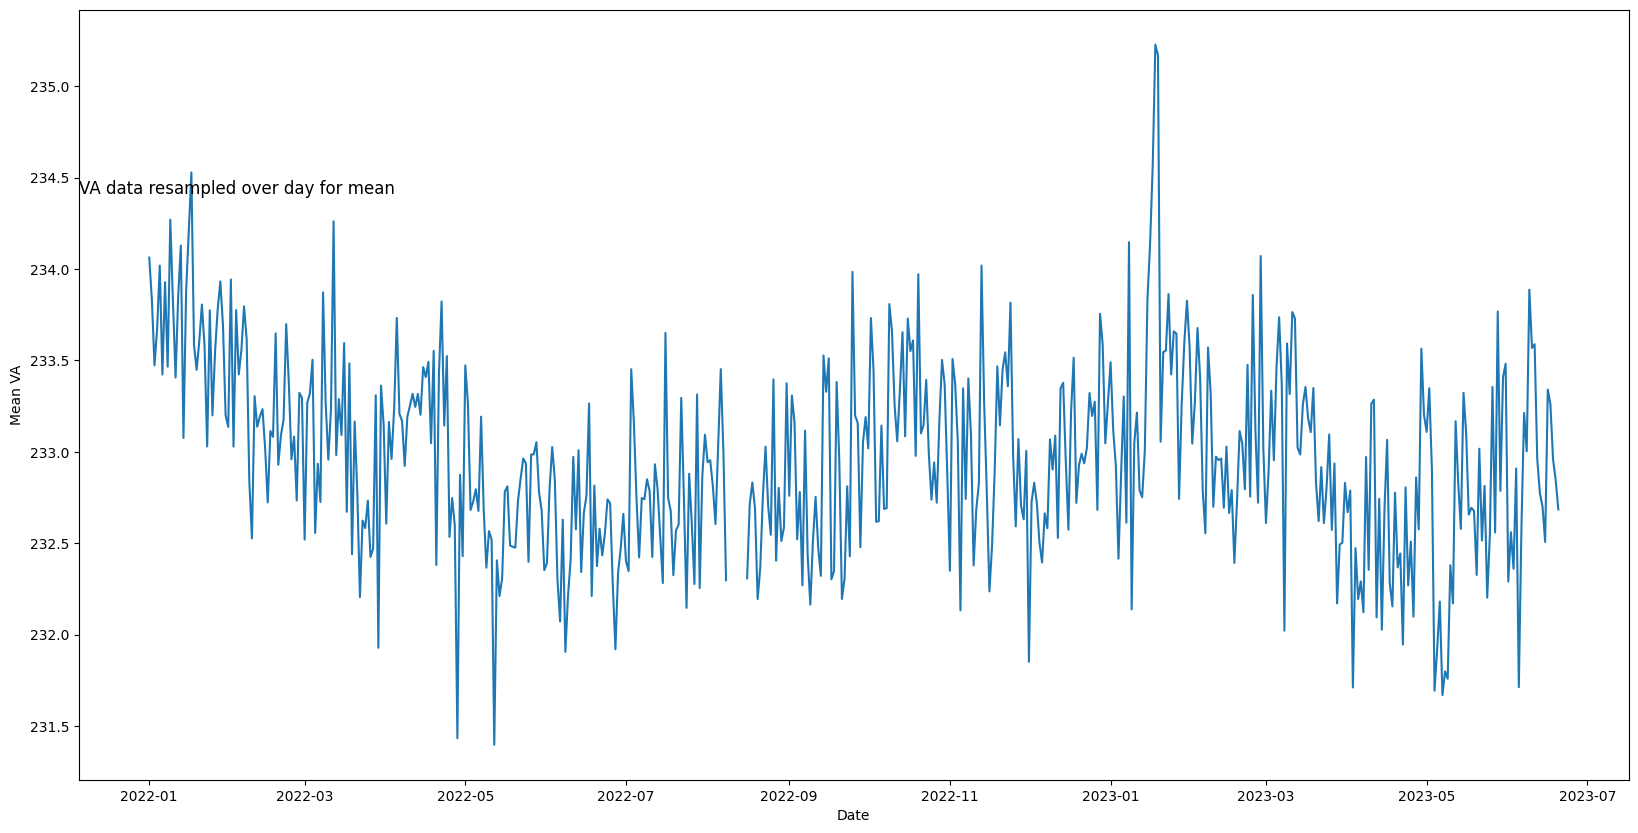

In [ ]:
monthly_mean = df.resample('D').mean()

plt.figure(figsize=(20, 10))
plt.plot(monthly_mean['VA'])
plt.title('VA data resampled over day for mean', y=0.75, loc='left')
plt.xlabel('Date')
plt.ylabel('Mean VA')
plt.show()

In [ ]:
monthly_mean.shape

(536, 5)

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [ ]:
df = df[['VA']]
df_resample = df.resample('H').mean()
df_resample.shape

(12855, 1)

In [ ]:
df_resample.head(10)

VA
dt                             
2022-01-01 00:00:00  235.820000
2022-01-01 01:00:00  234.956500
2022-01-01 02:00:00  235.073500
2022-01-01 03:00:00  234.748000
2022-01-01 04:00:00  234.680000
2022-01-01 05:00:00  235.860000
2022-01-01 06:00:00  232.777000
2022-01-01 07:00:00  232.835667
2022-01-01 08:00:00  232.956500
2022-01-01 09:00:00  231.914500

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
values = df_resample.values
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

values = df_resample.values
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_time = 6000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((6000, 1, 1), (6000,), (6548, 1, 1), (6548,))

Epoch 1/50
86/86 - 3s - loss: 0.0528 - val_loss: 0.0101 - 3s/epoch - 38ms/step
Epoch 2/50
86/86 - 1s - loss: 0.0110 - val_loss: 0.0103 - 693ms/epoch - 8ms/step
Epoch 3/50
86/86 - 1s - loss: 0.0111 - val_loss: 0.0101 - 553ms/epoch - 6ms/step
Epoch 4/50
86/86 - 1s - loss: 0.0110 - val_loss: 0.0100 - 854ms/epoch - 10ms/step
Epoch 5/50
86/86 - 1s - loss: 0.0109 - val_loss: 0.0100 - 899ms/epoch - 10ms/step
Epoch 6/50
86/86 - 1s - loss: 0.0109 - val_loss: 0.0100 - 1s/epoch - 14ms/step
Epoch 7/50
86/86 - 1s - loss: 0.0108 - val_loss: 0.0099 - 800ms/epoch - 9ms/step
Epoch 8/50
86/86 - 1s - loss: 0.0108 - val_loss: 0.0099 - 677ms/epoch - 8ms/step
Epoch 9/50
86/86 - 1s - loss: 0.0108 - val_loss: 0.0099 - 583ms/epoch - 7ms/step
Epoch 10/50
86/86 - 1s - loss: 0.0109 - val_loss: 0.0099 - 617ms/epoch - 7ms/step
Epoch 11/50
86/86 - 1s - loss: 0.0109 - val_loss: 0.0099 - 689ms/epoch - 8ms/step
Epoch 12/50
86/86 - 1s - loss: 0.0109 - val_loss: 0.0099 - 766ms/epoch - 9ms/step
Epoch 13/50
86/86 - 1s - lo

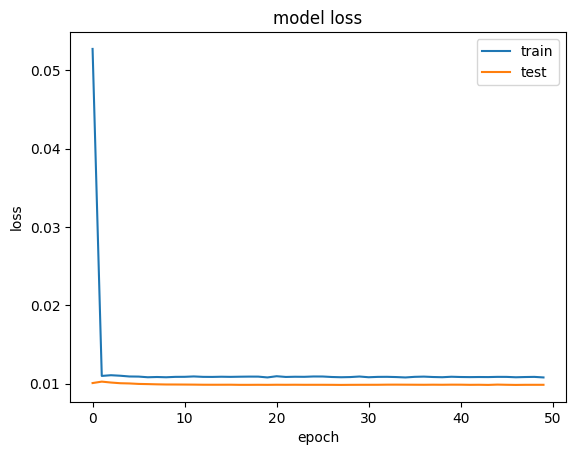

205/205 [==============================] - 1s 2ms/step
Test RMSE: 1.301


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df_resample.shape[1]

yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
r2_score(inv_y, inv_yhat)

0.2000489459436754

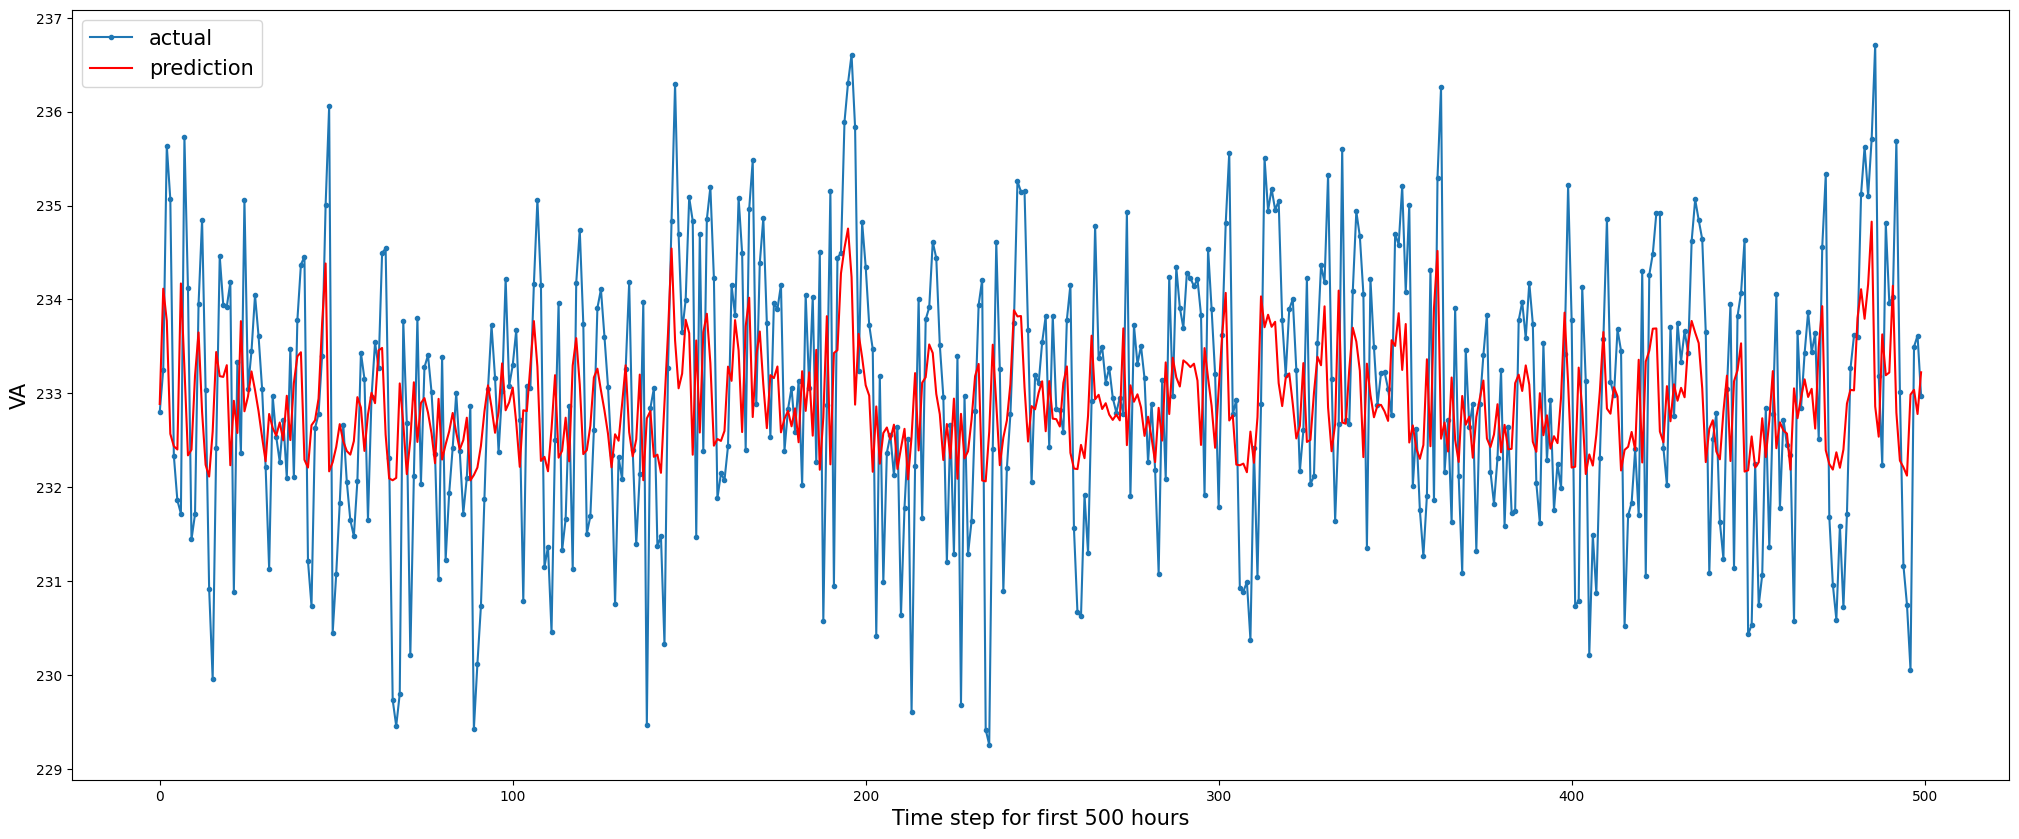

In [ ]:
aa=[x for x in range(500)]
plt.figure(figsize=(25,10))
plt.plot(aa, inv_y[:500], marker='.', label="actual")
plt.plot(aa, inv_yhat[:500], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
inv_y.shape

(6548,)

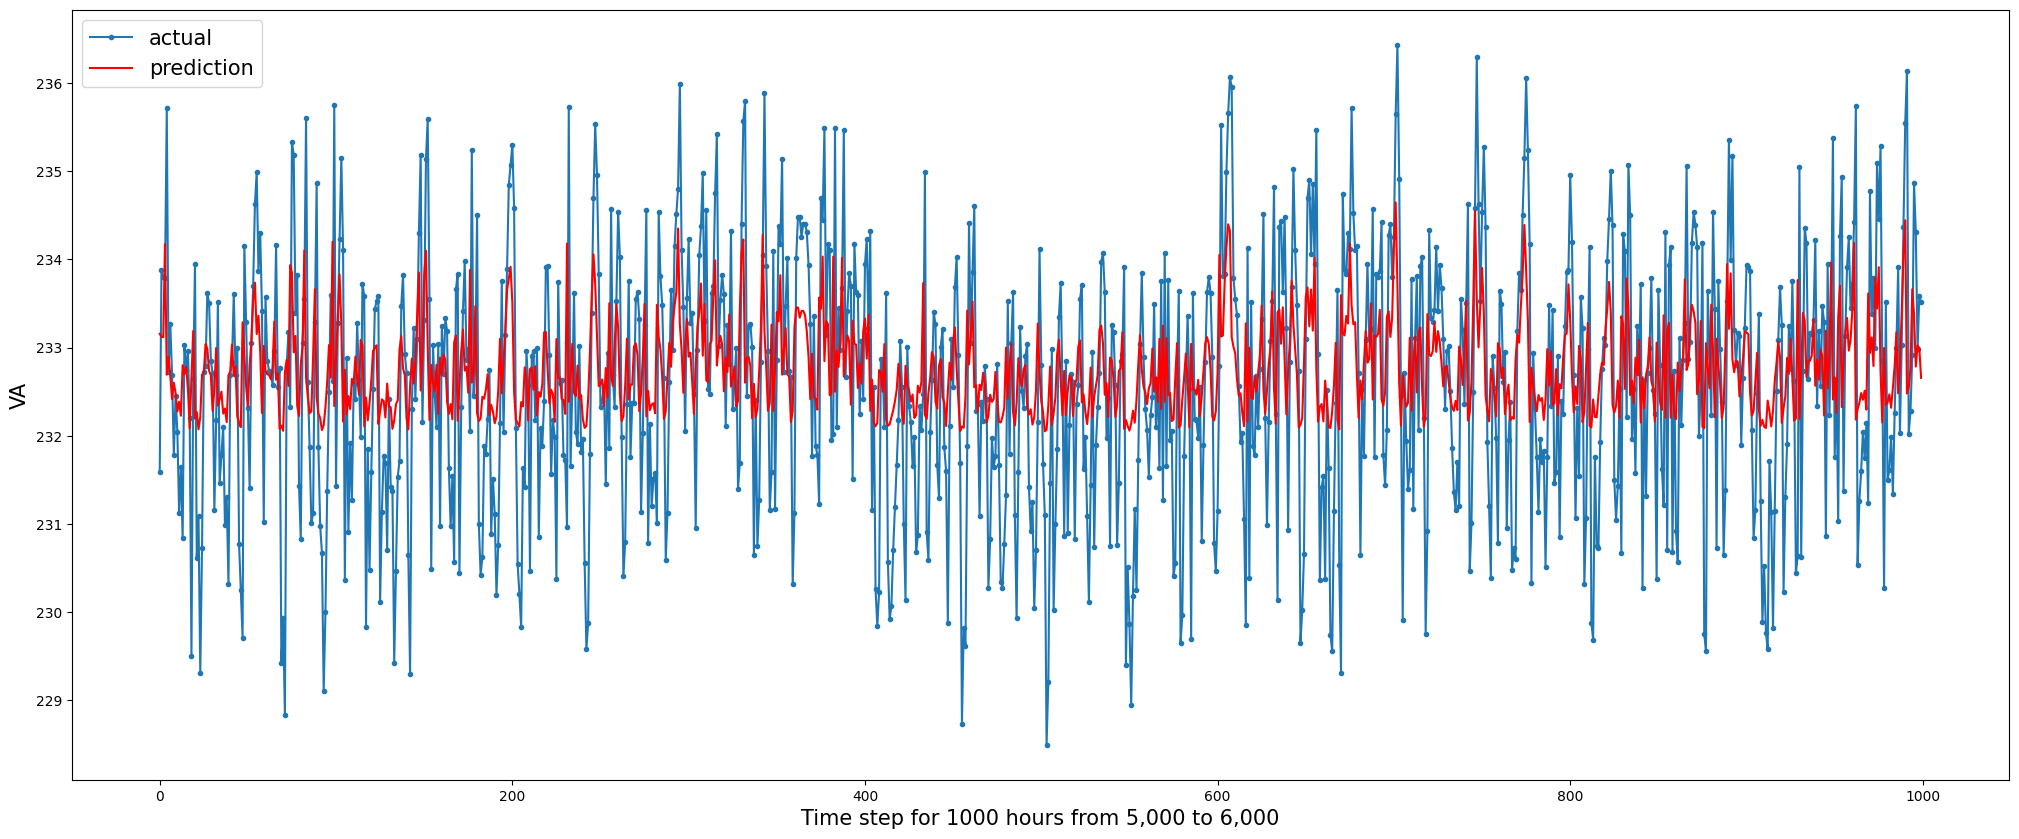

In [ ]:
aa=[x for x in range(1000)]
plt.figure(figsize=(25,10))
plt.plot(aa, inv_y[5000:6000], marker='.', label="actual")
plt.plot(aa, inv_yhat[5000:6000], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for 1000 hours from 5,000 to 6,000', size=15)
plt.legend(fontsize=15)
plt.show()

# METHOD 2

In [ ]:
df1 = pd.read_csv('/content/sample_data/KTE2_VA.csv',
                 parse_dates={'dt' : ['date', 'time']}, infer_datetime_format=True,
                 index_col='dt')
df1.head()

<ipython-input-178-1597343e0761>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df1 = pd.read_csv('/content/sample_data/KTE2_VA.csv',


VA  hour  day_of_week  month  day_of_year
dt                                                                 
2022-01-01 00:01:00  237.234     0            7      1            1
2022-01-01 00:57:00  234.406     0            7      1            1
2022-01-01 01:25:00  235.978     1            7      1            1
2022-01-01 01:54:00  233.935     1            7      1            1
2022-01-01 02:22:00  235.131     2            7      1            1

In [ ]:
df1 = df1[['VA']]

In [ ]:
df1.values

array([[237.234],
       [234.406],
       [235.978],
       ...,
       [233.709],
       [234.291],
       [235.209]])

In [ ]:
df = pd.read_csv('/content/KTE2_VA.csv',
                 parse_dates={'dt' : ['date', 'time']}, infer_datetime_format=True,
                 index_col='dt')
df.head()

<ipython-input-76-cb2ff6af66c4>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/KTE2_VA.csv',


VA  hour  day_of_week  month  day_of_year
dt                                                                 
2022-01-01 00:01:00  237.234     0            7      1            1
2022-01-01 00:57:00  234.406     0            7      1            1
2022-01-01 01:25:00  235.978     1            7      1            1
2022-01-01 01:54:00  233.935     1            7      1            1
2022-01-01 02:22:00  235.131     2            7      1            1

In [ ]:
df = df[['VA']]
df_resample = df.resample('H').mean()
df_resample.shape

(12855, 1)

In [ ]:
df.isna().sum()

VA    0
dtype: int64

In [ ]:
df1 = df_resample
df1.head()

VA
dt                           
2022-01-01 00:00:00  235.8200
2022-01-01 01:00:00  234.9565
2022-01-01 02:00:00  235.0735
2022-01-01 03:00:00  234.7480
2022-01-01 04:00:00  234.6800

In [ ]:
df1.fillna(np.mean(df1['VA']), inplace = True)
df1.isna().sum()

VA    0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
values = df1.values
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
df1['VA'] = scaled

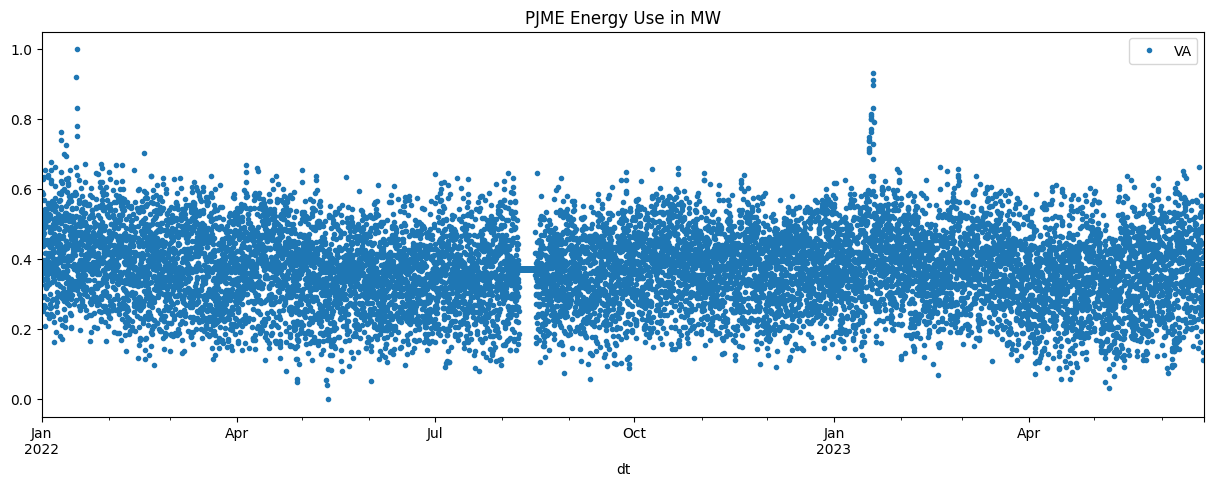

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df1.plot(style='.',
        figsize=(15, 5),
        color=sns.color_palette()[0],
        title='PJME Energy Use in MW')
plt.show()

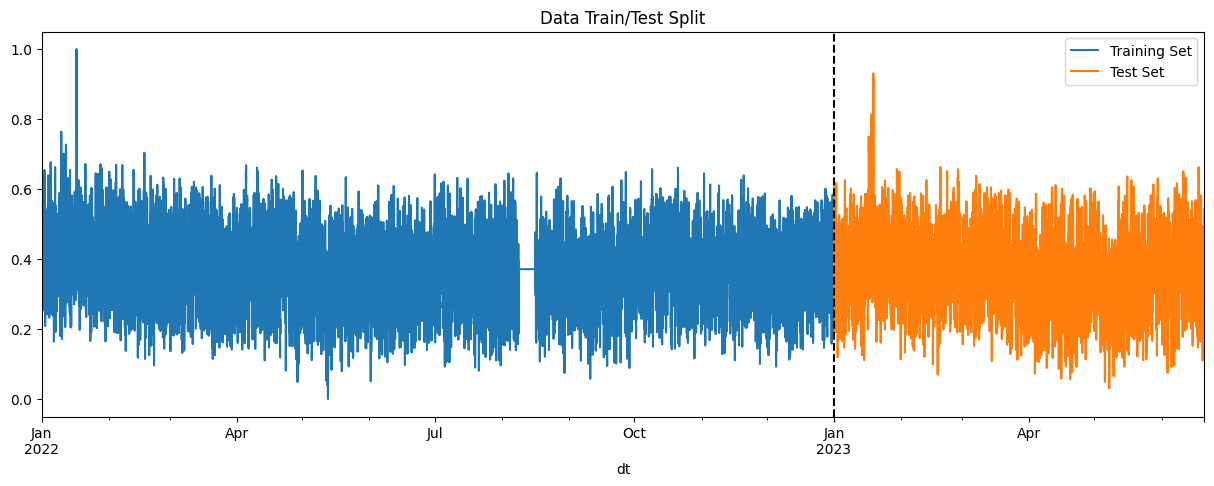

In [ ]:
train = df1.loc[df1.index < '01-01-2023']
test = df1.loc[df1.index >= '01-01-2023']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [ ]:
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df1 = create_features(df1)
df1.head()

VA  hour  dayofweek  quarter  month  year  \
dt                                                                     
2022-01-01 00:00:00  0.588899     0          5        1      1  2022   
2022-01-01 01:00:00  0.523063     1          5        1      1  2022   
2022-01-01 02:00:00  0.531984     2          5        1      1  2022   
2022-01-01 03:00:00  0.507167     3          5        1      1  2022   
2022-01-01 04:00:00  0.501982     4          5        1      1  2022   

                     dayofyear  dayofmonth  weekofyear  
dt                                                      
2022-01-01 00:00:00          1           1          52  
2022-01-01 01:00:00          1           1          52  
2022-01-01 02:00:00          1           1          52  
2022-01-01 03:00:00          1           1          52  
2022-01-01 04:00:00          1           1          52

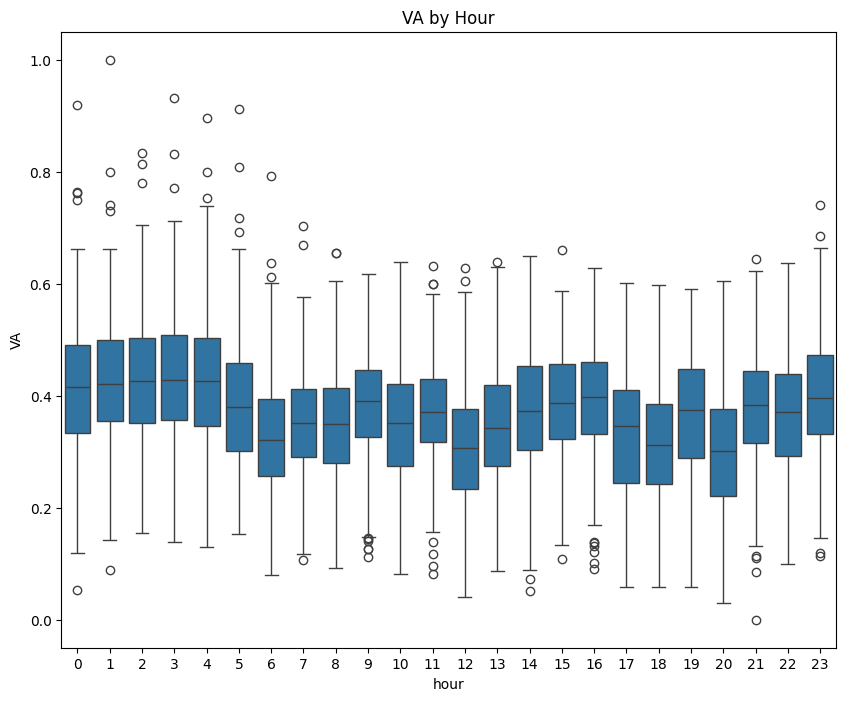

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df1, x='hour', y='VA')
ax.set_title('VA by Hour')
plt.show()

<ipython-input-86-ab3391cbf63b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='month', y='VA', palette='Blues')


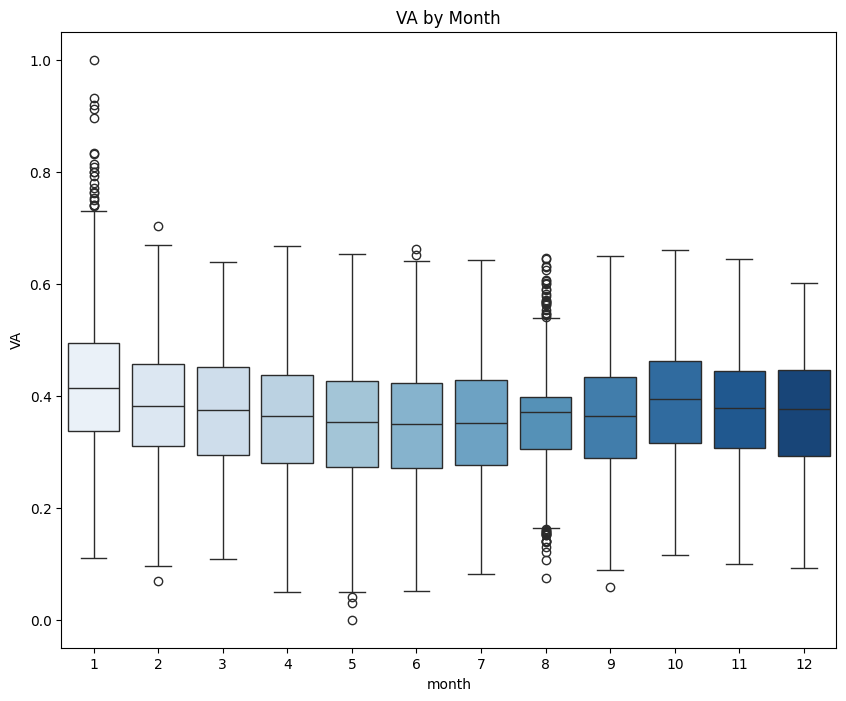

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df1, x='month', y='VA', palette='Blues')
ax.set_title('VA by Month')
plt.show()

In [ ]:
train = df1.loc[df1.index < '01-01-2023']
test = df1.loc[df1.index >= '01-01-2023']

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'VA'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:0.16677	validation_1-rmse:0.17274
[100]	validation_0-rmse:0.11296	validation_1-rmse:0.12196


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:42:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:0.10273	validation_1-rmse:0.11136
[300]	validation_0-rmse:0.10033	validation_1-rmse:0.10896
[400]	validation_0-rmse:0.09930	validation_1-rmse:0.10826
[500]	validation_0-rmse:0.09874	validation_1-rmse:0.10818
[600]	validation_0-rmse:0.09825	validation_1-rmse:0.10816
[603]	validation_0-rmse:0.09823	validation_1-rmse:0.10816


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

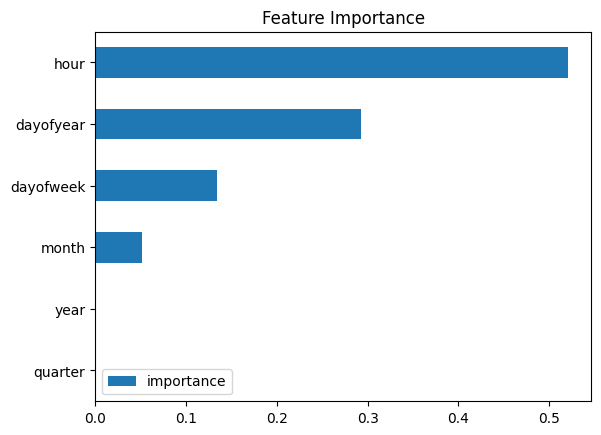

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

<ipython-input-91-1d6580fd5b2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


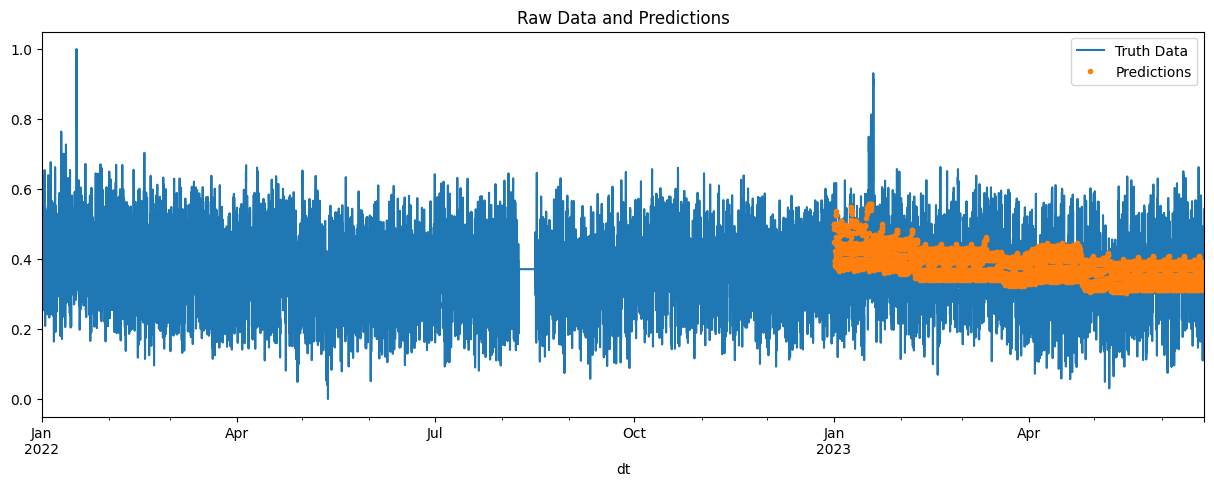

In [ ]:
test['prediction'] = reg.predict(X_test)
df1 = df1.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df1[['VA']].plot(figsize=(15, 5))
test['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Predictions')
plt.show()

In [ ]:
score = np.sqrt(mean_squared_error(test['VA'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 0.11


In [ ]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(5)

date
2023-01-19    0.173895
2023-01-09    0.146791
2023-01-18    0.134889
2023-04-14    0.128121
2023-01-04    0.122572
Name: error, dtype: float64

In [ ]:
r2_score(test['VA'], test['prediction'])

0.09417248136193734

# METHOD 3

In [ ]:
df3 = pd.read_excel('/content/KTE 2_delete some_PE0500_PE05000095055_TSVH_20062023151036.xlsx')

In [ ]:
df3 = df3[10:]
df3.head()

Unnamed: 0           Unnamed: 1           Unnamed: 2  \
10          1       01/01/22 00:00  01/01/2022 00:01:00   
11          2  01/01/2022 00:30:00                    -   
12          3       01/01/22 01:00  01/01/2022 00:57:00   
13          4       01/01/22 01:30  01/01/2022 01:25:00   
14          5       01/01/22 02:00  01/01/2022 01:54:00   

                                           Unnamed: 3 Unnamed: 4 Unnamed: 5  \
10  Serial: ML31717088282 - ML3 - Meter NURI\n- TU...    237.234    236.063   
11            Serial: - - -\n- TU: - - TI: - - HSN: -        NaN        NaN   
12  Serial: ML31717088282 - ML3 - Meter NURI\n- TU...    234.406    233.089   
13  Serial: ML31717088282 - ML3 - Meter NURI\n- TU...    235.978    234.657   
14  Serial: ML31717088282 - ML3 - Meter NURI\n- TU...    233.935    232.942   

   Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 27 Unnamed: 28  \
10     237.32      304.2     348.75     334.35  ...         NaN         NaN   
11        NaN        NaN        NaN        NaN  ...         NaN         NaN   
12    234.427      279.6      297.9     286.05  ...         NaN         NaN   
13    235.904     260.25      270.3     277.05  ...         NaN         NaN   
14     234.02        294      279.3     287.85  ...         NaN         NaN   

   Unnamed: 29 Unnamed: 30 Unnamed: 31 Unnamed: 32 Unnamed: 33 Unnamed: 34  \
10       50.13       50.12       50.12         NaN      811.59         230   
11         NaN         NaN         NaN         NaN         NaN         NaN   
12        50.1        50.1        50.1         NaN      811.59         230   
13       50.02       50.02       50.02         NaN      811.59         230   
14       49.99       49.99       49.99         NaN      811.59         230   

   Unnamed: 35 Unnamed: 36  
10         560      020343  
11         NaN           -  
12         560      020343  
13         560      020343  
14         560      020343  

[5 rows x 37 columns]

In [ ]:
df_clean = df3[['Unnamed: 1', 'Unnamed: 4']]
df_clean.columns = ['datetime', 'VA']
df_clean.head()

datetime       VA
10       01/01/22 00:00  237.234
11  01/01/2022 00:30:00      NaN
12       01/01/22 01:00  234.406
13       01/01/22 01:30  235.978
14       01/01/22 02:00  233.935

In [ ]:
df_clean['datetime'] = pd.to_datetime(df_clean['datetime']).dt.strftime("%d-%m-%Y %H:%M:%S")

<ipython-input-59-11640ce09081>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['datetime'] = pd.to_datetime(df_clean['datetime']).dt.strftime("%d-%m-%Y %H:%M:%S")
<ipython-input-59-11640ce09081>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['datetime'] = pd.to_datetime(df_clean['datetime']).dt.strftime("%d-%m-%Y %H:%M:%S")


In [ ]:
df_clean.shape

(25277, 2)

In [ ]:
df_clean.dropna(inplace=True)

<ipython-input-64-f60ba1d5b782>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(inplace=True)


In [ ]:
df_clean.to_csv('KTE2_VA_dmy.csv', index=False)

In [ ]:
df = pd.read_csv('/content/KTE2_VA_dmy.csv',
                 index_col='datetime')
df.tail()

VA
datetime                    
20-06-2023 12:30:00  230.992
20-06-2023 13:00:00  232.302
20-06-2023 13:30:00  233.709
20-06-2023 14:00:00  234.291
20-06-2023 14:30:00  235.209

<Axes: xlabel='datetime'>

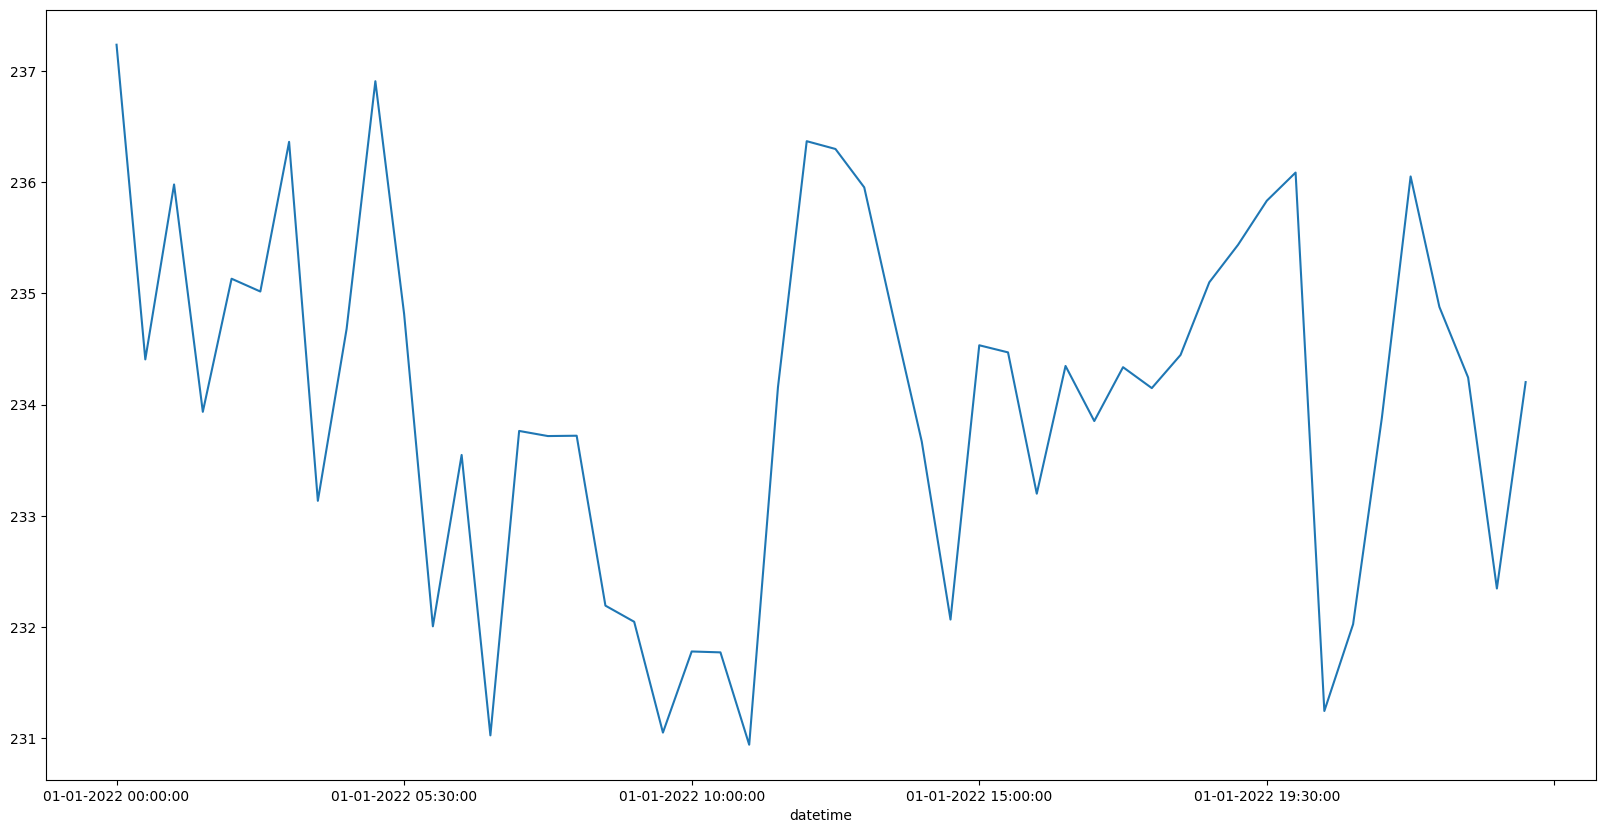

In [ ]:
plt.figure(figsize=(20, 10))
df['VA'][:50].plot()

In [ ]:
from numpy import array

def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if end_ix > len(sequence)-1:
      break
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [ ]:
X_train, y_train = split_sequence(df['VA'][:20000].values, 4)
print(X_train.shape, y_train.shape)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(19996, 4) (19996,)
(19996, 4, 1)


In [ ]:
X_test, y_test = split_sequence(df['VA'][20000:].values, 4)
print(X_test.shape, y_test.shape)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(5273, 4) (5273,)
(5273, 4, 1)


In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

n_steps = 4
n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
yhat = model.predict(X_test, verbose = 0)
mean_squared_error(y_test, yhat)

2.24798626590963

In [ ]:
r2_score(y_test, yhat)

0.13934180277676433

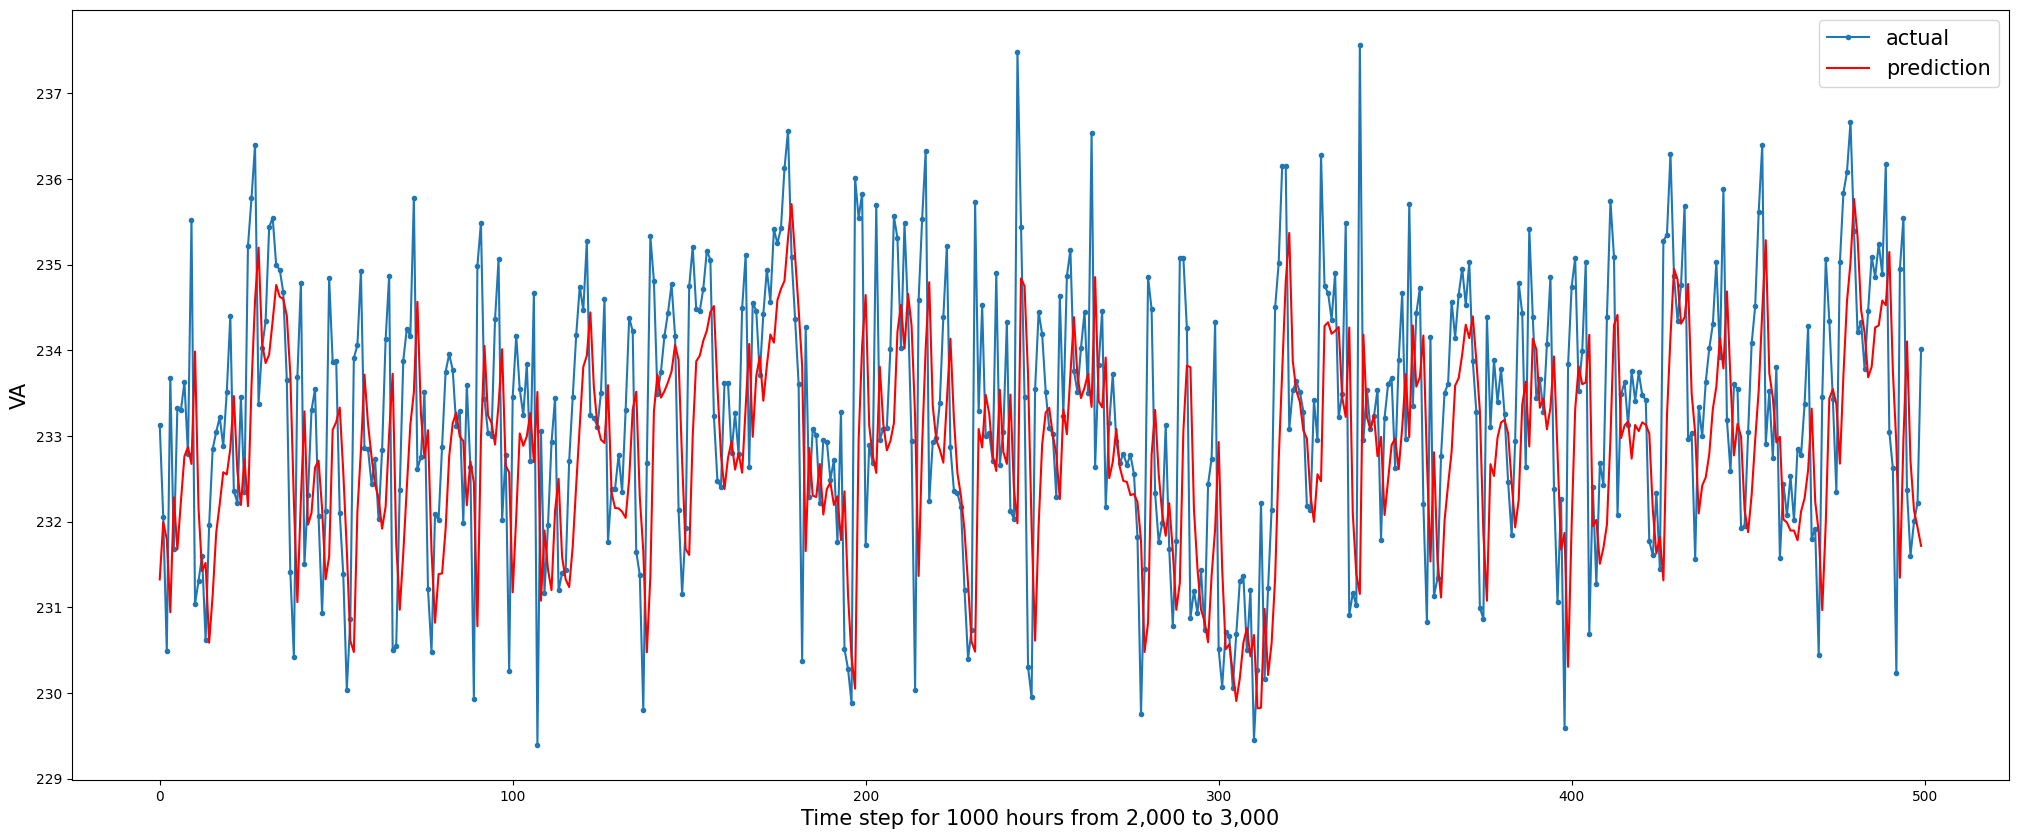

In [ ]:
aa=[x for x in range(500)]
plt.figure(figsize=(25,10))
plt.plot(aa, y_test[:500], marker='.', label="actual")
plt.plot(aa, yhat[:500], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for 1000 hours from 2,000 to 3,000', size=15)
plt.legend(fontsize=15)
plt.show()

# METHOD 4

In [ ]:
df = pd.read_csv('/content/KTE2_VA.csv',
                 parse_dates={'dt' : ['date', 'time']}, infer_datetime_format=True,
                 )
df.head()

<ipython-input-56-7a8bffb9d812>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/KTE2_VA.csv',


dt       VA  hour  day_of_week  month  day_of_year
0 2022-01-01 00:01:00  237.234     0            7      1            1
1 2022-01-01 00:57:00  234.406     0            7      1            1
2 2022-01-01 01:25:00  235.978     1            7      1            1
3 2022-01-01 01:54:00  233.935     1            7      1            1
4 2022-01-01 02:22:00  235.131     2            7      1            1

In [ ]:
df.shape

(25259, 6)

In [ ]:
month1 = df[df['month'] == 1]

In [ ]:
month2 = df[df['month'] == 2]

In [ ]:
import seaborn as sns

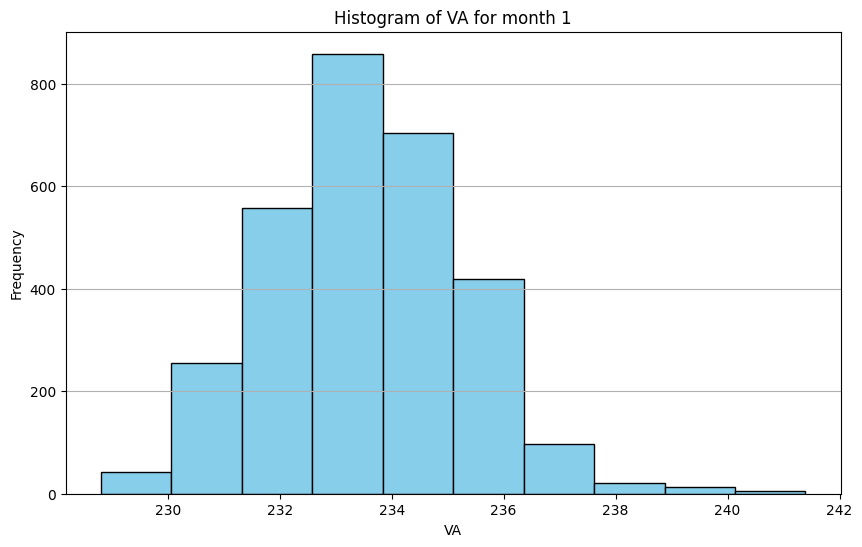

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(month1['VA'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of VA for month 1')
plt.xlabel('VA')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

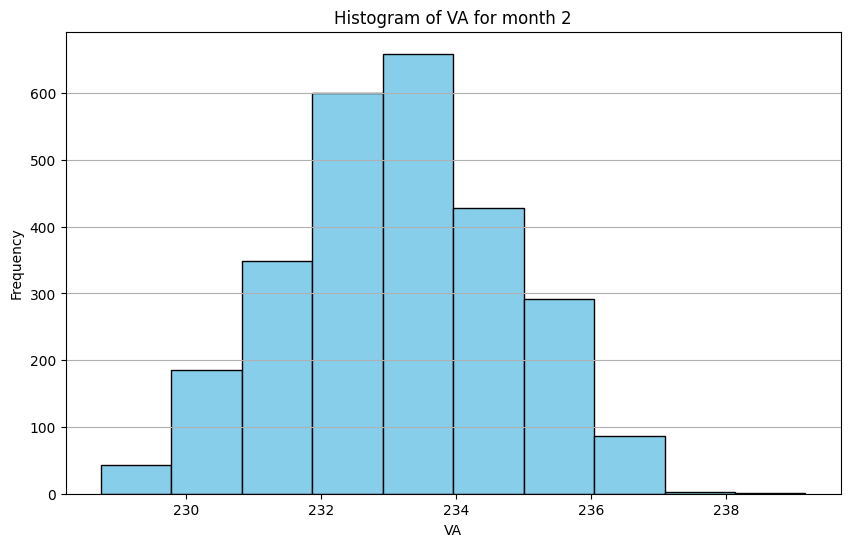

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(month2['VA'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of VA for month 2')
plt.xlabel('VA')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [ ]:
day7 = df[df['day_of_week'] == 7]

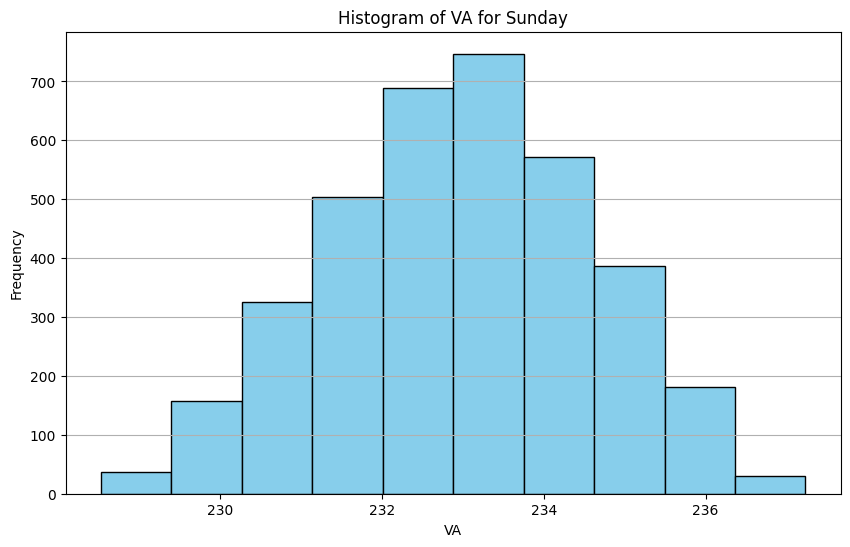

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(day7['VA'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of VA for Sunday')
plt.xlabel('VA')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

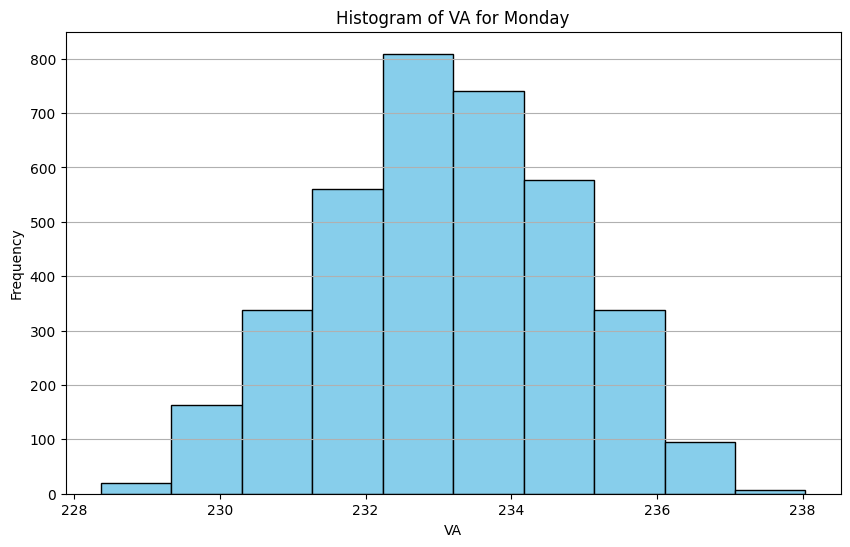

In [ ]:
day1 = df[df['day_of_week'] == 1]
plt.figure(figsize=(10, 6))
plt.hist(day1['VA'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of VA for Monday')
plt.xlabel('VA')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

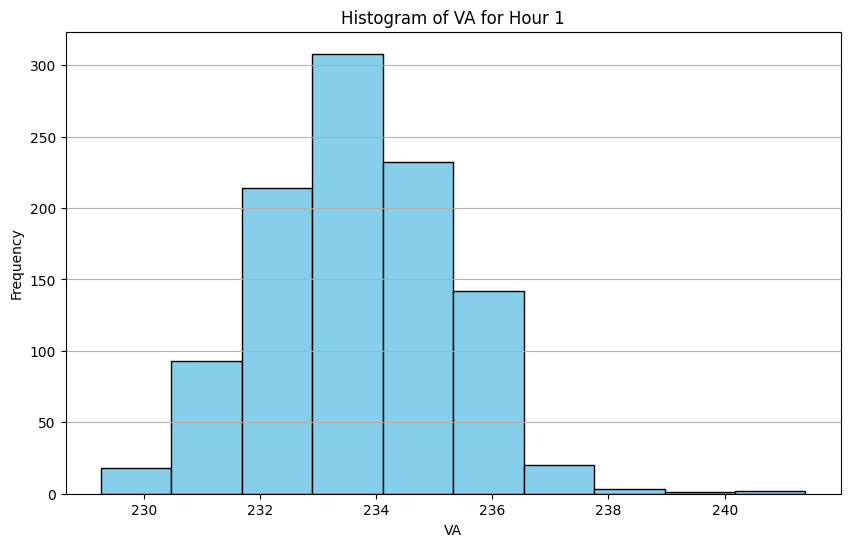

In [ ]:
hour1 = df[df['hour'] == 1]
plt.figure(figsize=(10, 6))
plt.hist(hour1['VA'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of VA for Hour 1')
plt.xlabel('VA')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

df['lag1'] = df['VA'].shift(1)
df['lag2'] = df['VA'].shift(2)

df.dropna(inplace=True)

train_df, test_df = train_test_split(df, test_size=0.4, shuffle=False)

In [ ]:
df.shape

(25257, 8)

In [ ]:
train_df.shape, test_df.shape

((15154, 8), (10103, 8))

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_df[['VA', 'lag1', 'lag2']])
test_scaled = scaler.transform(test_df[['VA', 'lag1', 'lag2']])

In [ ]:
train_scaled.shape, test_scaled.shape

((15154, 3), (10103, 3))

In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

seq_length = 3

X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15151, 3, 2), (10100, 3, 2), (15151,), (10100,))

In [ ]:
train_scaled[:10]

array([[0.63739282, 0.53208735, 0.72153001],
       [0.50053591, 0.63739282, 0.53208735],
       [0.5806538 , 0.50053591, 0.63739282],
       [0.57295016, 0.5806538 , 0.50053591],
       [0.6630493 , 0.57295016, 0.5806538 ],
       [0.44694534, 0.6630493 , 0.57295016],
       [0.55044212, 0.44694534, 0.6630493 ],
       [0.69955788, 0.55044212, 0.44694534],
       [0.55941854, 0.69955788, 0.55044212],
       [0.37138264, 0.55941854, 0.69955788]])

In [ ]:
X_train[:5]

array([[[0.63739282, 0.53208735],
        [0.50053591, 0.63739282],
        [0.5806538 , 0.50053591]],

       [[0.50053591, 0.63739282],
        [0.5806538 , 0.50053591],
        [0.57295016, 0.5806538 ]],

       [[0.5806538 , 0.50053591],
        [0.57295016, 0.5806538 ],
        [0.6630493 , 0.57295016]],

       [[0.57295016, 0.5806538 ],
        [0.6630493 , 0.57295016],
        [0.44694534, 0.6630493 ]],

       [[0.6630493 , 0.57295016],
        [0.44694534, 0.6630493 ],
        [0.55044212, 0.44694534]]])

In [ ]:
y_train[:5]

array([0.50053591, 0.5806538 , 0.57295016, 0.6630493 , 0.44694534])

In [ ]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)

Epoch 1/50
427/427 [==============================] - 6s 6ms/step - loss: 0.0061 - val_loss: 0.0016
Epoch 2/50
427/427 [==============================] - 2s 5ms/step - loss: 6.5537e-04 - val_loss: 7.1960e-05
Epoch 3/50
427/427 [==============================] - 2s 5ms/step - loss: 5.5812e-05 - val_loss: 2.5468e-05
Epoch 4/50
427/427 [==============================] - 2s 5ms/step - loss: 3.6117e-05 - val_loss: 1.9700e-05
Epoch 5/50
427/427 [==============================] - 3s 7ms/step - loss: 2.7615e-05 - val_loss: 1.4967e-05
Epoch 6/50
427/427 [==============================] - 3s 6ms/step - loss: 2.0124e-05 - val_loss: 1.0989e-05
Epoch 7/50
427/427 [==============================] - 2s 5ms/step - loss: 1.3964e-05 - val_loss: 8.5857e-06
Epoch 8/50
427/427 [==============================] - 2s 5ms/step - loss: 9.3737e-06 - val_loss: 5.7109e-06
Epoch 9/50
427/427 [==============================] - 2s 5ms/step - loss: 6.5064e-06 - val_loss: 3.5007e-06
Epoch 10/50
427/427 [===============

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

316/316 [==============================] - 1s 3ms/step
Mean Squared Error (MSE): 6.699679818660768e-08
Mean Absolute Error (MAE): 0.0001245062203740813
R-squared (R²): 0.9999944198010338


In [ ]:
y_pred = scaler.inverse_transform(np.hstack((X_test[:, -1, :], y_pred.reshape(-1, 1))))
y_test = scaler.inverse_transform(np.hstack((X_test[:, -1, :], y_test.reshape(-1, 1))))

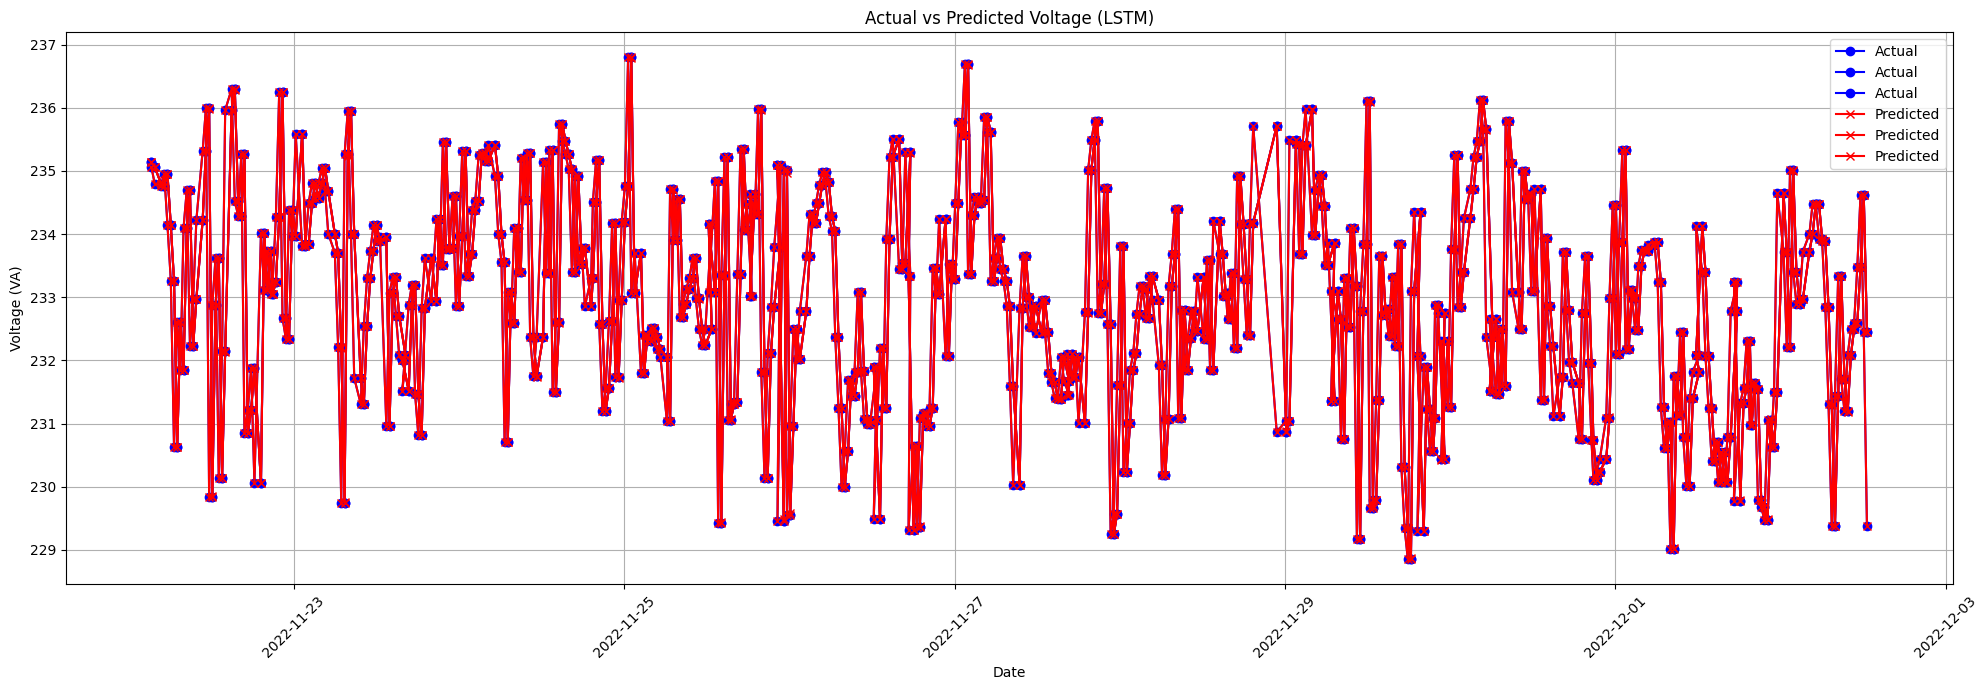

In [ ]:
plt.figure(figsize=(20, 7))
plt.plot(test_df['dt'].iloc[seq_length:500], y_test[:497], label='Actual', color='blue', marker='o')
plt.plot(test_df['dt'].iloc[seq_length:500], y_pred[:497], label='Predicted', color='red', marker='x')

plt.xlabel('Date')
plt.ylabel('Voltage (VA)')
plt.title('Actual vs Predicted Voltage (LSTM)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<Axes: >

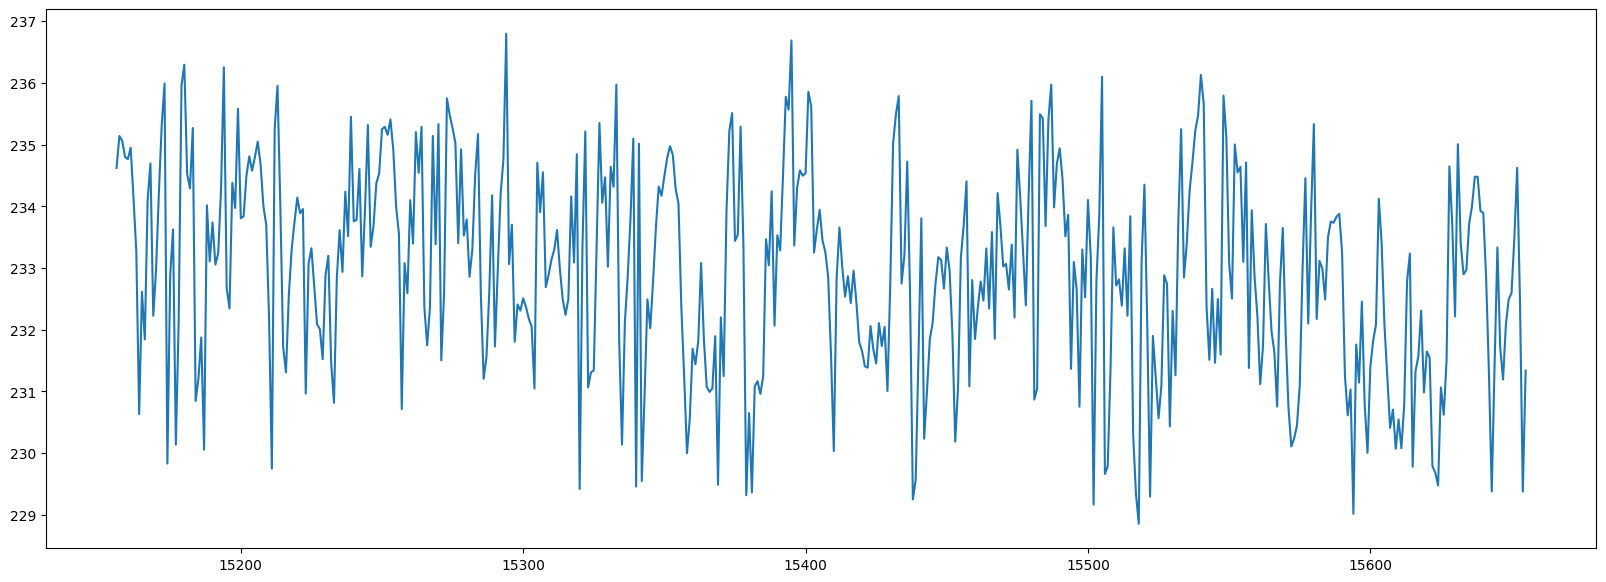

In [ ]:
plt.figure(figsize=(20, 7))
test_df['VA'][:500].plot()

# METHOD 5

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/KTE2_VA.csv',
                 parse_dates={'dt' : ['date', 'time']}, infer_datetime_format=True,
                 )
df.head()

df['lag1'] = df['VA'].shift(1)

df.dropna(inplace=True)

train_df, test_df = train_test_split(df, test_size=0.4, shuffle=False)

train_data = {day: train_df[train_df['day_of_week'] == day] for day in train_df['day_of_week'].unique()}
test_data = {day: test_df[test_df['day_of_week'] == day] for day in test_df['day_of_week'].unique()}

models = {}
for day, data in train_data.items():
    X_train = data[['hour', 'lag1']]
    y_train = data['VA']
    model = LinearRegression()
    model.fit(X_train, y_train)
    models[day] = model

predictions = []
actuals = []
dates = []

for day, data in test_data.items():
    if day in models:
        model = models[day]
        X_test = data[['hour', 'lag1']]
        y_test = data['VA']
        y_pred_log = model.predict(X_test)
        y_pred = model.predict(X_test)
        predictions.extend(y_pred)
        actuals.extend(y_test)
        dates.extend(data['dt'])

result_df = pd.DataFrame({'Date': dates, 'Actual': actuals, 'Prediction': predictions})

result_df.sort_values(by='Date', inplace=True)

plt.figure(figsize=(20, 7))
plt.plot(result_df['Date'][:500], result_df['Actual'][:500], label='Actual', color='blue', marker='o')
plt.plot(result_df['Date'][:500], result_df['Prediction'][:500], label='Predicted', color='red', marker='x')

plt.xlabel('Date')
plt.ylabel('Voltage (VA)')
plt.title('Actual vs Predicted Voltage')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

mse = mean_squared_error(actuals, predictions)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/KTE2_VA.csv',
                 parse_dates={'dt' : ['date', 'time']}, infer_datetime_format=True,
                 )
df.head()

<ipython-input-2-7a8bffb9d812>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/KTE2_VA.csv',


dt       VA  hour  day_of_week  month  day_of_year
0 2022-01-01 00:01:00  237.234     0            7      1            1
1 2022-01-01 00:57:00  234.406     0            7      1            1
2 2022-01-01 01:25:00  235.978     1            7      1            1
3 2022-01-01 01:54:00  233.935     1            7      1            1
4 2022-01-01 02:22:00  235.131     2            7      1            1

In [3]:
df['lag1'] = df['VA'].shift(1)

df.dropna(inplace=True)

train_df, test_df = train_test_split(df, test_size=0.4, shuffle=False)

In [4]:
train_data = {day: train_df[train_df['day_of_week'] == day] for day in train_df['day_of_week'].unique()}
test_data = {day: test_df[test_df['day_of_week'] == day] for day in test_df['day_of_week'].unique()}

In [5]:
models = {}
for day, data in train_data.items():
    X_train = data[['hour', 'lag1']]
    y_train = data['VA']
    model = LinearRegression()
    model.fit(X_train, y_train)
    models[day] = model


In [6]:
predictions = []
actuals = []
dates = []

for day, data in test_data.items():
    if day in models:
        model = models[day]
        X_test = data[['hour', 'lag1']]
        y_test = data['VA']
        y_pred_log = model.predict(X_test)
        y_pred = model.predict(X_test)
        predictions.extend(y_pred)
        actuals.extend(y_test)
        dates.extend(data['dt'])

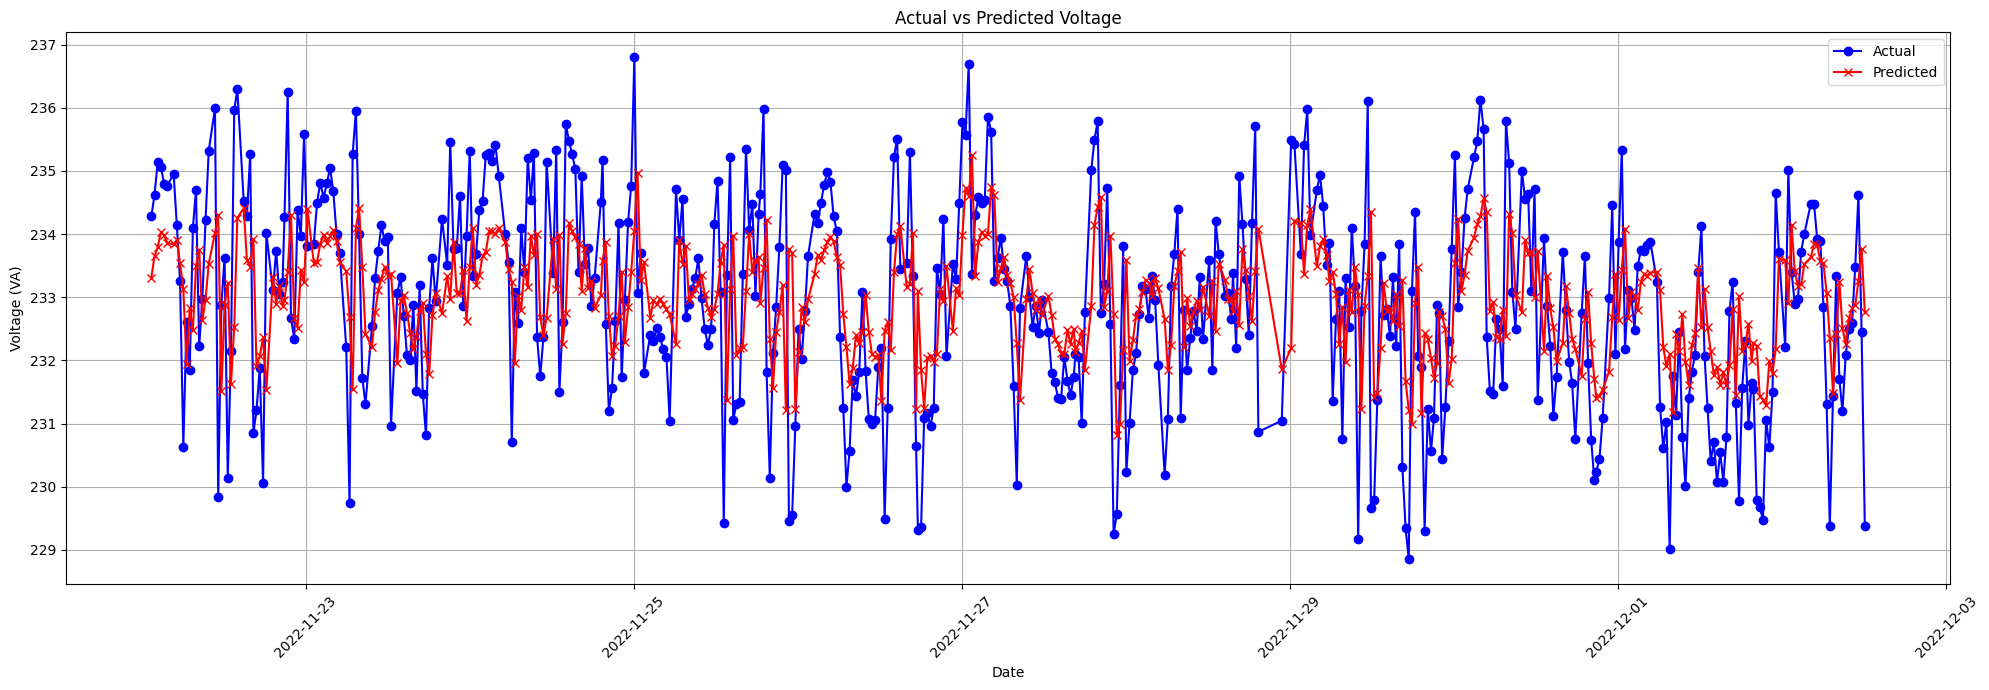

In [7]:
result_df = pd.DataFrame({'Date': dates, 'Actual': actuals, 'Prediction': predictions})

result_df.sort_values(by='Date', inplace=True)

plt.figure(figsize=(20, 7))
plt.plot(result_df['Date'][:500], result_df['Actual'][:500], label='Actual', color='blue', marker='o')
plt.plot(result_df['Date'][:500], result_df['Prediction'][:500], label='Predicted', color='red', marker='x')

plt.xlabel('Date')
plt.ylabel('Voltage (VA)')
plt.title('Actual vs Predicted Voltage')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [8]:
mse = mean_squared_error(actuals, predictions)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 1.8540619185025542
Mean Absolute Error (MAE): 1.0779980562737277
R-squared (R²): 0.30704688212844555
